Methods and functions for stock selection: Price Quintiles and Z-score ATR

In [279]:
import pandas as pd
from pandas_datareader import data as web
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import quantstats as qs

In [280]:
def Quintile(data, ticker):
    pass

def ATR(data, period):
    
    for i in range(1, len(data)):
        d1 = data.loc[i, 'High'] - data.loc[i, 'Low']
        d2 = abs(data.loc[i, 'High'] - data.loc[i-1, 'Close'])
        d3 = abs(data.loc[i, 'Low'] - data.loc[i-1, 'Close'])
        data.loc[i, 'TR'] = max(d1, d2, d3).round(2)
    
    data['ATR'] =  data['TR'].rolling(period).mean()
    
    return data

In [281]:
end = datetime.today()
start = end - timedelta(days=426)

In [282]:
tickers = [
           'PLZL.ME', 'DPM.TO', 'RMS.AX', 'CG.TO', '2899.HK', 'BTG', 'EGO', 'GOR.AX', 'NCM.AX', 'WDO.TO', 'POLY.L', 
           'EQX.TO', 'CEY.L', 'PVG', 'SBM.AX', 'BVN', 'PRU.AX', 'NST.AX', 'EDV.TO', 'LUN.TO', 'RRL.AX', 'POG.L', 'KGC', 'GFI', 'TGZ.TO', 'CDE', 
           'TXG.TO', 'DRD', 'NG', 'AU', 'GOLD', 'EVN.AX', 'NEM', 'SAR.AX', 'AUY', 'AEM', 'WPM', 'IAG', 'SSRM', 'OGC.TO', 'AGI', 'NGD', 'HMY', 'SAND', 'SBSW', 'FNV', 'RGLD', 'OR', 'SA', 'ANTM.JK'
           ]

In [283]:
tickers = ['PAAS']

In [284]:
#tickers = ['GC=F', 'SI=F','HG=F', 'PL=F', 'PA=F', '^TNX', 'CL=F', 'NG=F', '6E=F', '6B=F', '6J=F', '6S=F', '6A=F', 'BTC-USD', 'ETH-USD', 'XRP-USD']

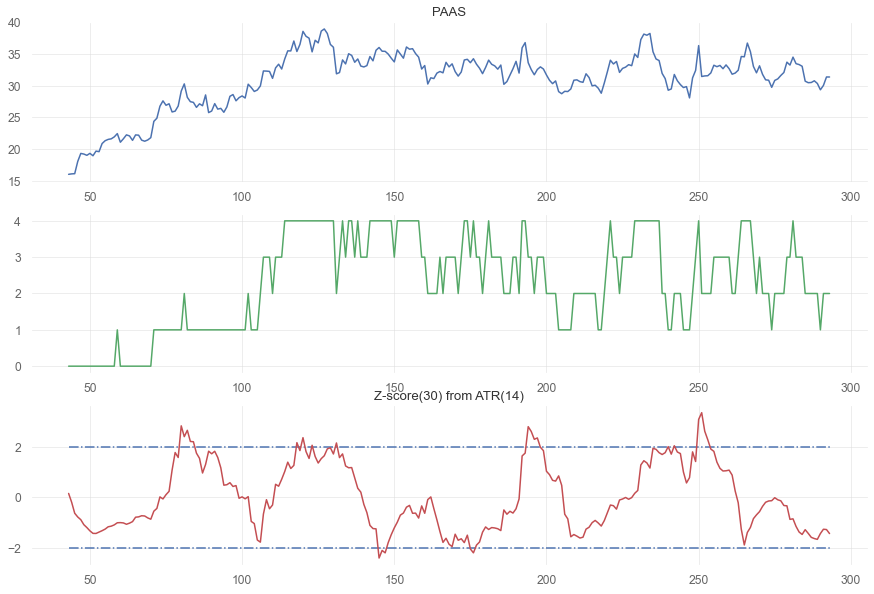

In [285]:
PERIOD_ATR = 14
PERIOD_Z = 30

PLOT = True

for ticker in tickers:
    try:
        data = web.get_data_yahoo(ticker, start, end)
        data = data.reset_index()
        
        data['Quintile'] = pd.qcut(data['Close'], 5, labels=False)
        ATR(data, PERIOD_ATR)
        data['Z'] = (data['ATR'] - data['ATR'].rolling(PERIOD_Z).mean()) / data['ATR'].rolling(PERIOD_Z).std()
        data['Logreturn'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
        data = data.dropna()
        #data = data.reset_index()
        
        if PLOT:
       
            plt.figure(figsize=(15,10))

            plt.subplot(3,1,1)
            plt.plot(data['Adj Close'])
            plt.title(ticker)
            plt.grid(True)
        
            plt.subplot(3,1,2)
            plt.plot(data['Quintile'], c='g')
            plt.grid(True)
        
            plt.subplot(3,1,3)
            plt.plot(data['Z'], c='r')
            plt.hlines(2, min(data.index), max(data.index), linestyles='dashdot')
            plt.hlines(-2, min(data.index),  max(data.index), linestyles='dashdot')
            plt.title(f'Z-score({PERIOD_Z}) from ATR({PERIOD_ATR})')
            plt.grid(True)

            plt.show()
        
        
    except:
        print(f'Cannot calculate for {ticker}!')

In [286]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Quintile,TR,ATR,Z,Logreturn
43,2020-04-06,16.32,15.360000,15.750000,16.139999,4289700.0,16.013607,0,1.32,2.205000,0.158410,0.073250
44,2020-04-07,17.07,16.000000,16.530001,16.209999,4292400.0,16.083061,0,1.07,1.987143,-0.191853,0.004328
45,2020-04-08,16.83,16.000000,16.570000,16.240000,1967100.0,16.112825,0,0.83,1.731429,-0.624904,0.001849
46,2020-04-09,18.40,16.860001,17.100000,18.190001,4340300.0,18.047556,0,2.16,1.675000,-0.772390,0.113395
47,2020-04-13,19.68,17.330000,18.190001,19.459999,5004600.0,19.307610,0,2.35,1.637857,-0.879141,0.067489


In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 43 to 293
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   High       251 non-null    float64       
 2   Low        251 non-null    float64       
 3   Open       251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Volume     251 non-null    float64       
 6   Adj Close  251 non-null    float64       
 7   Quintile   251 non-null    int64         
 8   TR         251 non-null    float64       
 9   ATR        251 non-null    float64       
 10  Z          251 non-null    float64       
 11  Logreturn  251 non-null    float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 25.5 KB


In [288]:
data['Signal'] = np.where((data['Quintile'] <= 1) & (abs(data['Z']) >= 1.95), 1, 0)

In [289]:
data.loc[data['Signal'] == 1]

,Date,High,Low,Open,Close,Volume,Adj Close,Quintile,TR,ATR,Z,Logreturn,Signal
80,2020-05-29,29.900000,27.830000,27.870001,29.299999,10023300.0,29.136864,1,2.97,1.606429,2.830837,0.084347,1
82,2020-06-02,30.590000,28.290001,30.500000,28.309999,4965800.0,28.152376,1,2.30,1.687143,2.654767,-0.072542,1
83,2020-06-03,28.120001,27.139999,27.219999,27.620001,3473700.0,27.466219,1,1.17,1.670714,2.214485,-0.024675,1
84,2020-06-04,28.580000,27.139999,28.250000,27.510000,3418600.0,27.356831,1,1.44,1.711429,2.202240,-0.003991,1
240,2021-01-15,30.889999,29.320000,30.790001,29.330000,4403600.0,29.272053,1,1.85,1.722857,2.008368,-0.060845,1


In [290]:
data = data.set_index('Date')

In [291]:
qs.stats.sharpe(data['Logreturn'])

1.1844660174441362

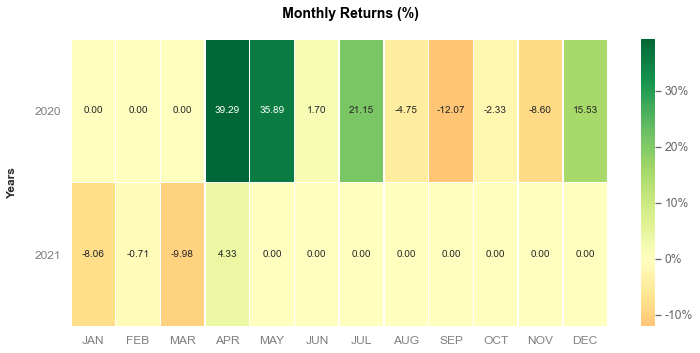

In [292]:
qs.plots.monthly_heatmap(data['Logreturn'])

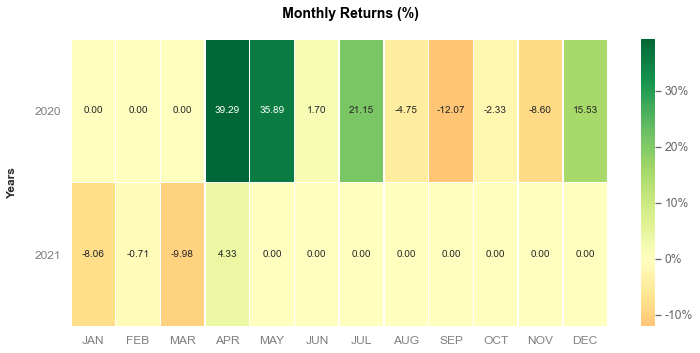

In [293]:
qs.plots.monthly_returns(data['Logreturn'])

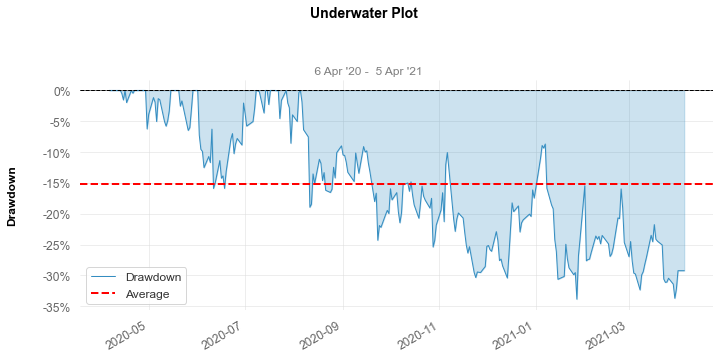

In [294]:
qs.plots.drawdown(data['Logreturn'])

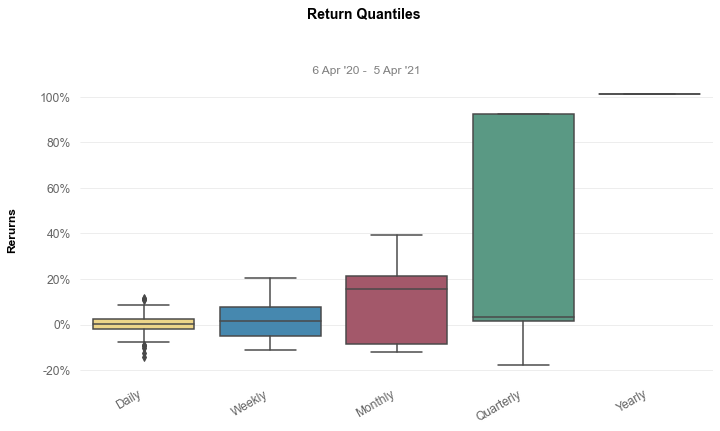

In [295]:
qs.plots.distribution(data['Logreturn'])

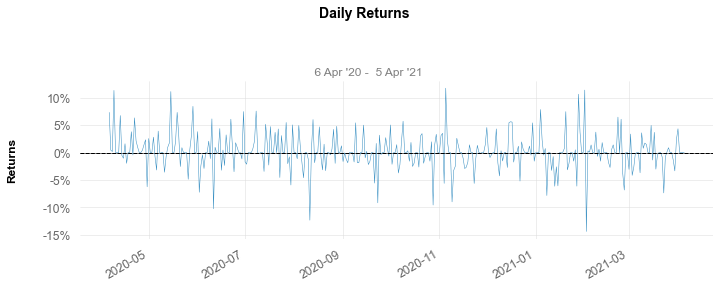

In [296]:
qs.plots.daily_returns(data['Logreturn'])

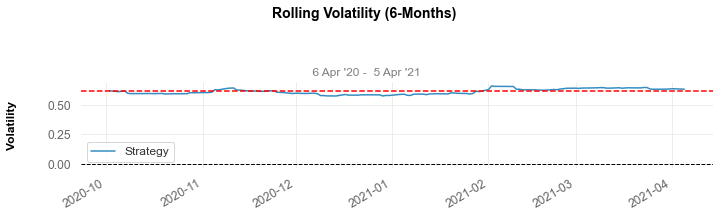

In [297]:
qs.plots.rolling_volatility(data['Logreturn'])